In [1]:
import os
import numpy as np
import xarray as xr
import holoviews as hv
import pandas as pd
from matplotlib import pyplot as plt
#from holoviews.operation.datashader import regrid, shade
%matplotlib inline

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
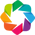

In [2]:
hv.extension('bokeh')

In [3]:
#url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA09/.Grid-1x1/.Seasonal/.temperature/dods'
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2/.multi-satellite/dods'
ds = xr.open_dataset(url, decode_times=False).chunk({'T': 1})
ds


<xarray.Dataset>
Dimensions:  (T: 354, X: 144, Y: 72)
Coordinates:
  * Y        (Y) float32 88.75 86.25 83.75 81.25 78.75 76.25 73.75 71.25 ...
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
  * T        (T) float32 228.5 229.5 230.5 231.5 232.5 233.5 234.5 235.5 ...
Data variables:
    err      (T, Y, X) float32 dask.array<shape=(354, 72, 144), chunksize=(1, 72, 144)>
    prcp     (T, Y, X) float32 dask.array<shape=(354, 72, 144), chunksize=(1, 72, 144)>
Attributes:
    Conventions:  IRIDL

In [4]:
ds['T'].attrs

OrderedDict([('calendar', '360'),
             ('standard_name', 'time'),
             ('pointwidth', 1.0),
             ('gridtype', 0),
             ('units', 'months since 1960-01-01')])

In [5]:
time = pd.date_range('1960-01-01', freq='MS', periods=len(ds['T']))
time

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1988-09-01', '1988-10-01', '1988-11-01', '1988-12-01',
               '1989-01-01', '1989-02-01', '1989-03-01', '1989-04-01',
               '1989-05-01', '1989-06-01'],
              dtype='datetime64[ns]', length=354, freq='MS')

In [6]:
ds['T'].data = time

In [7]:
ds['T'] = time
ds['T'].attrs

OrderedDict()

In [8]:
pcrp_snapshot = ds.prcp[0]
pcrp_snapshot

<xarray.DataArray 'prcp' (Y: 72, X: 144)>
dask.array<shape=(72, 144), dtype=float32, chunksize=(72, 144)>
Coordinates:
  * Y        (Y) float32 88.75 86.25 83.75 81.25 78.75 76.25 73.75 71.25 ...
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
    T        datetime64[ns] 1960-01-01
Attributes:
    pointwidth:  0
    units:       mm/day
    technique:   Multi-Satellite
    long_name:   precipitation

In [9]:
pcrp_hv = hv.Dataset(pcrp_snapshot)
pcrp_hv

:Dataset   [Y,X]   (prcp)

In [10]:
pcrp_hv.to(hv.Image, ['X', 'Y'])

:Image   [X,Y]   (prcp)

In [11]:
%opts Image [width=600, height=400] (cmap='magma')
pcrp_hv.to(hv.Image, ['X', 'Y'])

:Image   [X,Y]   (prcp)

In [12]:
ds_hv = hv.Dataset(ds)
ds_hv

:Dataset   [Y,X,T]   (err,prcp)

In [13]:
prcp_im = ds_hv.to(hv.Image, ['X', 'Y'], vdims=['prcp'], dynamic=True)
err_im = ds_hv.to(hv.Image, ['X', 'Y'], vdims=['err'], dynamic=True)

In [14]:
%opts Image [width=300, height=200, colorbar=True]
prcp_im + err_im

/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/compatibility.py:50: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/compatibility.py:50: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


:Layout
   .DynamicMap.I  :DynamicMap   [T]
      :Image   [X,Y]   (prcp)
   .DynamicMap.II :DynamicMap   [T]
      :Image   [X,Y]   (err)

In [15]:
shade(regrid(im))

NameError: name 'shade' is not defined

In [ ]:
pcrp_hv.aggregate('Y', np.nanmean).to(hv.Curve)